In [156]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint

In [158]:
#Search for all property types in zip code 78745 (Travis County-near Lake Travis)
payload = {
    'Accept': 'application/json',
    'apikey': '85e8e036400dee107740b3c7e4653375',
    'accept': 'application/json'
}
zipcodes = [78745,78705,78729,78732,78702]

market_value = []
sq_ft = []
zip_code = []
prop_type = []
year_built = []

for zipcode in zipcodes:
    url = f"https://api.gateway.attomdata.com/propertyapi/v1.0.0/assessment/detail?postalcode={zipcode}&propertyIndicator=10&pagesize=20"
    s = requests.Session()
    response = s.get(url, headers = payload)
    json_response = response.json()
    
    for item in json_response['property']:
        market_value.append(item['assessment']['market']['mktttlvalue'])
        sq_ft.append(item['building']['size']['bldgsize'])
        zip_code.append(item['address']['postal1'])
        prop_type.append(item['summary']['proptype'])
        year_built.append(item['summary']['yearbuilt'])

In [159]:
for zipcode in zipcodes:
    url = f"https://api.gateway.attomdata.com/propertyapi/v1.0.0/assessment/detail?postalcode={zipcode}&propertyIndicator=11&pagesize=20"
    s = requests.Session()
    response = s.get(url, headers = payload)
    json_response = response.json()
    
    for item in json_response['property']:
        market_value.append(item['assessment']['market']['mktttlvalue'])
        sq_ft.append(item['building']['size']['bldgsize'])
        zip_code.append(item['address']['postal1'])
        prop_type.append(item['summary']['proptype'])
        year_built.append(item['summary']['yearbuilt'])   

In [160]:
for zipcode in zipcodes:
    url = f"https://api.gateway.attomdata.com/propertyapi/v1.0.0/assessment/detail?postalcode={zipcode}&propertyIndicator=21&pagesize=20"
    s = requests.Session()
    response = s.get(url, headers = payload)
    json_response = response.json()
    
    for item in json_response['property']:
        market_value.append(item['assessment']['market']['mktttlvalue'])
        sq_ft.append(item['building']['size']['bldgsize'])
        zip_code.append(item['address']['postal1'])
        prop_type.append(item['summary']['proptype'])
        year_built.append(item['summary']['yearbuilt'])

In [161]:
df = pd.DataFrame({"Zip Code": zip_code, "Property Type": prop_type, "Square Feet": sq_ft, "Market Value": market_value,
                  "Year Built": year_built})

In [162]:
bins = [1889,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019]
bin_labels = ["1900's","1910's","1920's","1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]
df["Decade Built"] = pd.cut(df["Year Built"],bins,labels=bin_labels)
df = df.sort_values(["Decade Built"], ascending=True)
df.head(100)

,Zip Code,Property Type,Square Feet,Market Value,Year Built,Decade Built
20,78705,SFR,0,682787,1908,1900's
234,78705,DUPLEX,5503,606300,1902,1900's
24,78705,SFR,4529,986000,1900,1900's
231,78705,QUADRUPLEX,3810,514634,1900,1900's
235,78705,TRIPLEX,2143,470161,1900,1900's
...,...,...,...,...,...,...
4,78745,SFR,2287,302262,1976,1970's
3,78745,SFR,2062,277665,1976,1970's
2,78745,SFR,1563,212751,1976,1970's
6,78745,SFR,1774,263343,1976,1970's


In [163]:
df.to_csv("Austin_Housind_Data.csv")

In [144]:
new_df = df.groupby(["Decade Built"])["Market Value"].mean()
new_df = new_df.fillna(0)
avg_value = []
for i in range(len(new_df)): 
    avg_value.append(new_df[i])

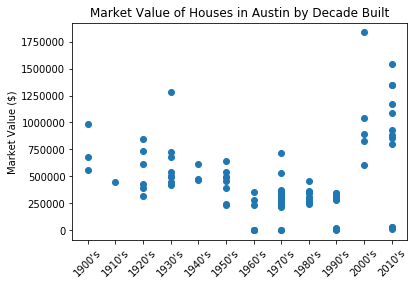

In [145]:
x = df["Decade Built"].tolist()
y = df["Market Value"].tolist()
plt.scatter(x,y)
plt.title("Market Value of Houses in Austin by Decade Built")
plt.ylabel("Market Value ($)")
plt.xticks(rotation=45)
plt.show()

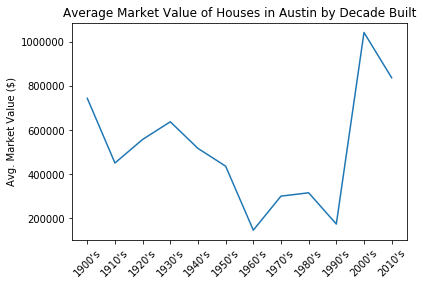

In [146]:
plt.plot(bin_labels,avg_value)
plt.title("Average Market Value of Houses in Austin by Decade Built")
plt.ylabel("Avg. Market Value ($)")
plt.xticks(rotation=45)
plt.show()